In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random

import plotly.plotly as py
import plotly.graph_objs as go

nx.__version__

'2.2'

In [5]:
read_data = pd.read_csv("/Users/golnargharoonifard/Desktop/Final Project/data/pnas.1713568115.sd01.txt")
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)

data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change ms to s
data['time'] = data['time'].map(lambda x: [x])

In [6]:
data.tail()

trial   id1   id2         begin           end   time
302216      1  2039  2043  1.372852e+12  1.372852e+12  [9.0]
302217      1  2039  2047  1.373215e+12  1.373215e+12  [2.0]
302218      1  2040  2043  1.372928e+12  1.372928e+12  [7.0]
302219      1  2040  2043  1.372928e+12  1.372928e+12  [2.0]
302220      1  2040  2043  1.372928e+12  1.372928e+12  [8.0]

In [7]:
data.sort_values('begin')
data.tail()

trial   id1   id2         begin           end   time
302216      1  2039  2043  1.372852e+12  1.372852e+12  [9.0]
302217      1  2039  2047  1.373215e+12  1.373215e+12  [2.0]
302218      1  2040  2043  1.372928e+12  1.372928e+12  [7.0]
302219      1  2040  2043  1.372928e+12  1.372928e+12  [2.0]
302220      1  2040  2043  1.372928e+12  1.372928e+12  [8.0]

#### starting time = Wednesday, July 3, 2013 5:23:20 AM
#### end time = Sunday, July 14, 2013 5:33:20 AM

In [8]:
id1_unique = data['id1'].unique()
id2_unique = data['id2'].unique()
len(id2_unique)

1159

In [9]:
data = data.groupby(['id1','id2']).agg({'time': 'sum'}) #group by id1 and id2 as nodes and time as a list of weights
data.head()

time
id1 id2                  
201 219       [2.0, 42.0]
    242      [2.0, 2.999]
    255          [41.999]
    259  [15.0, 3.0, 8.0]
    262          [27.999]

In [10]:
data = data.reset_index() #reset index after group by as there are some none values for column id1

In [11]:
data.head()

id1  id2              time
0  201  219       [2.0, 42.0]
1  201  242      [2.0, 2.999]
2  201  255          [41.999]
3  201  259  [15.0, 3.0, 8.0]
4  201  262          [27.999]

### Build a directed graph

In [12]:
G_directed = nx.DiGraph() #initialize the graph
for index, row in data.iterrows():
    #print(row[0],row[1],row[2])
    G_directed.add_edge(row[0],row[1], weight = row[2]) #add node1,node2,weight list iteratively to the graph

In [13]:
#print(G.edges)
nodes = list(G_directed.nodes)
len(set(nodes)) #number of unique nodes

1164

In [14]:
l = list(G_directed.edges)
len(set(l)) #number of unique edges

200723

In [15]:
print(len(G_directed.edges))

200723


In [97]:
dim = nx.diameter (G_directed)
dim

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [101]:
out_degrees = dict(G_directed.out_degree())
sum_of_edges = sum(out_degrees.values())
mean_out_degree = sum_of_edges/len (out_degrees)
mean_out_degree


172.44243986254295

## Visualize the directed graph

In [39]:
e = [(u, v) for (u, v, d) in G_directed.edges(data=True)][:1000] #do it for 1000 edges as there are too many edges
pos = nx.random_layout(G_directed)  #positions for all nodes
len(e)

1000

In [40]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (56, 28))
# Font size to 14
matplotlib.rc('font', size = 14)
# Add grid lines
matplotlib.rc('axes', grid = True)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

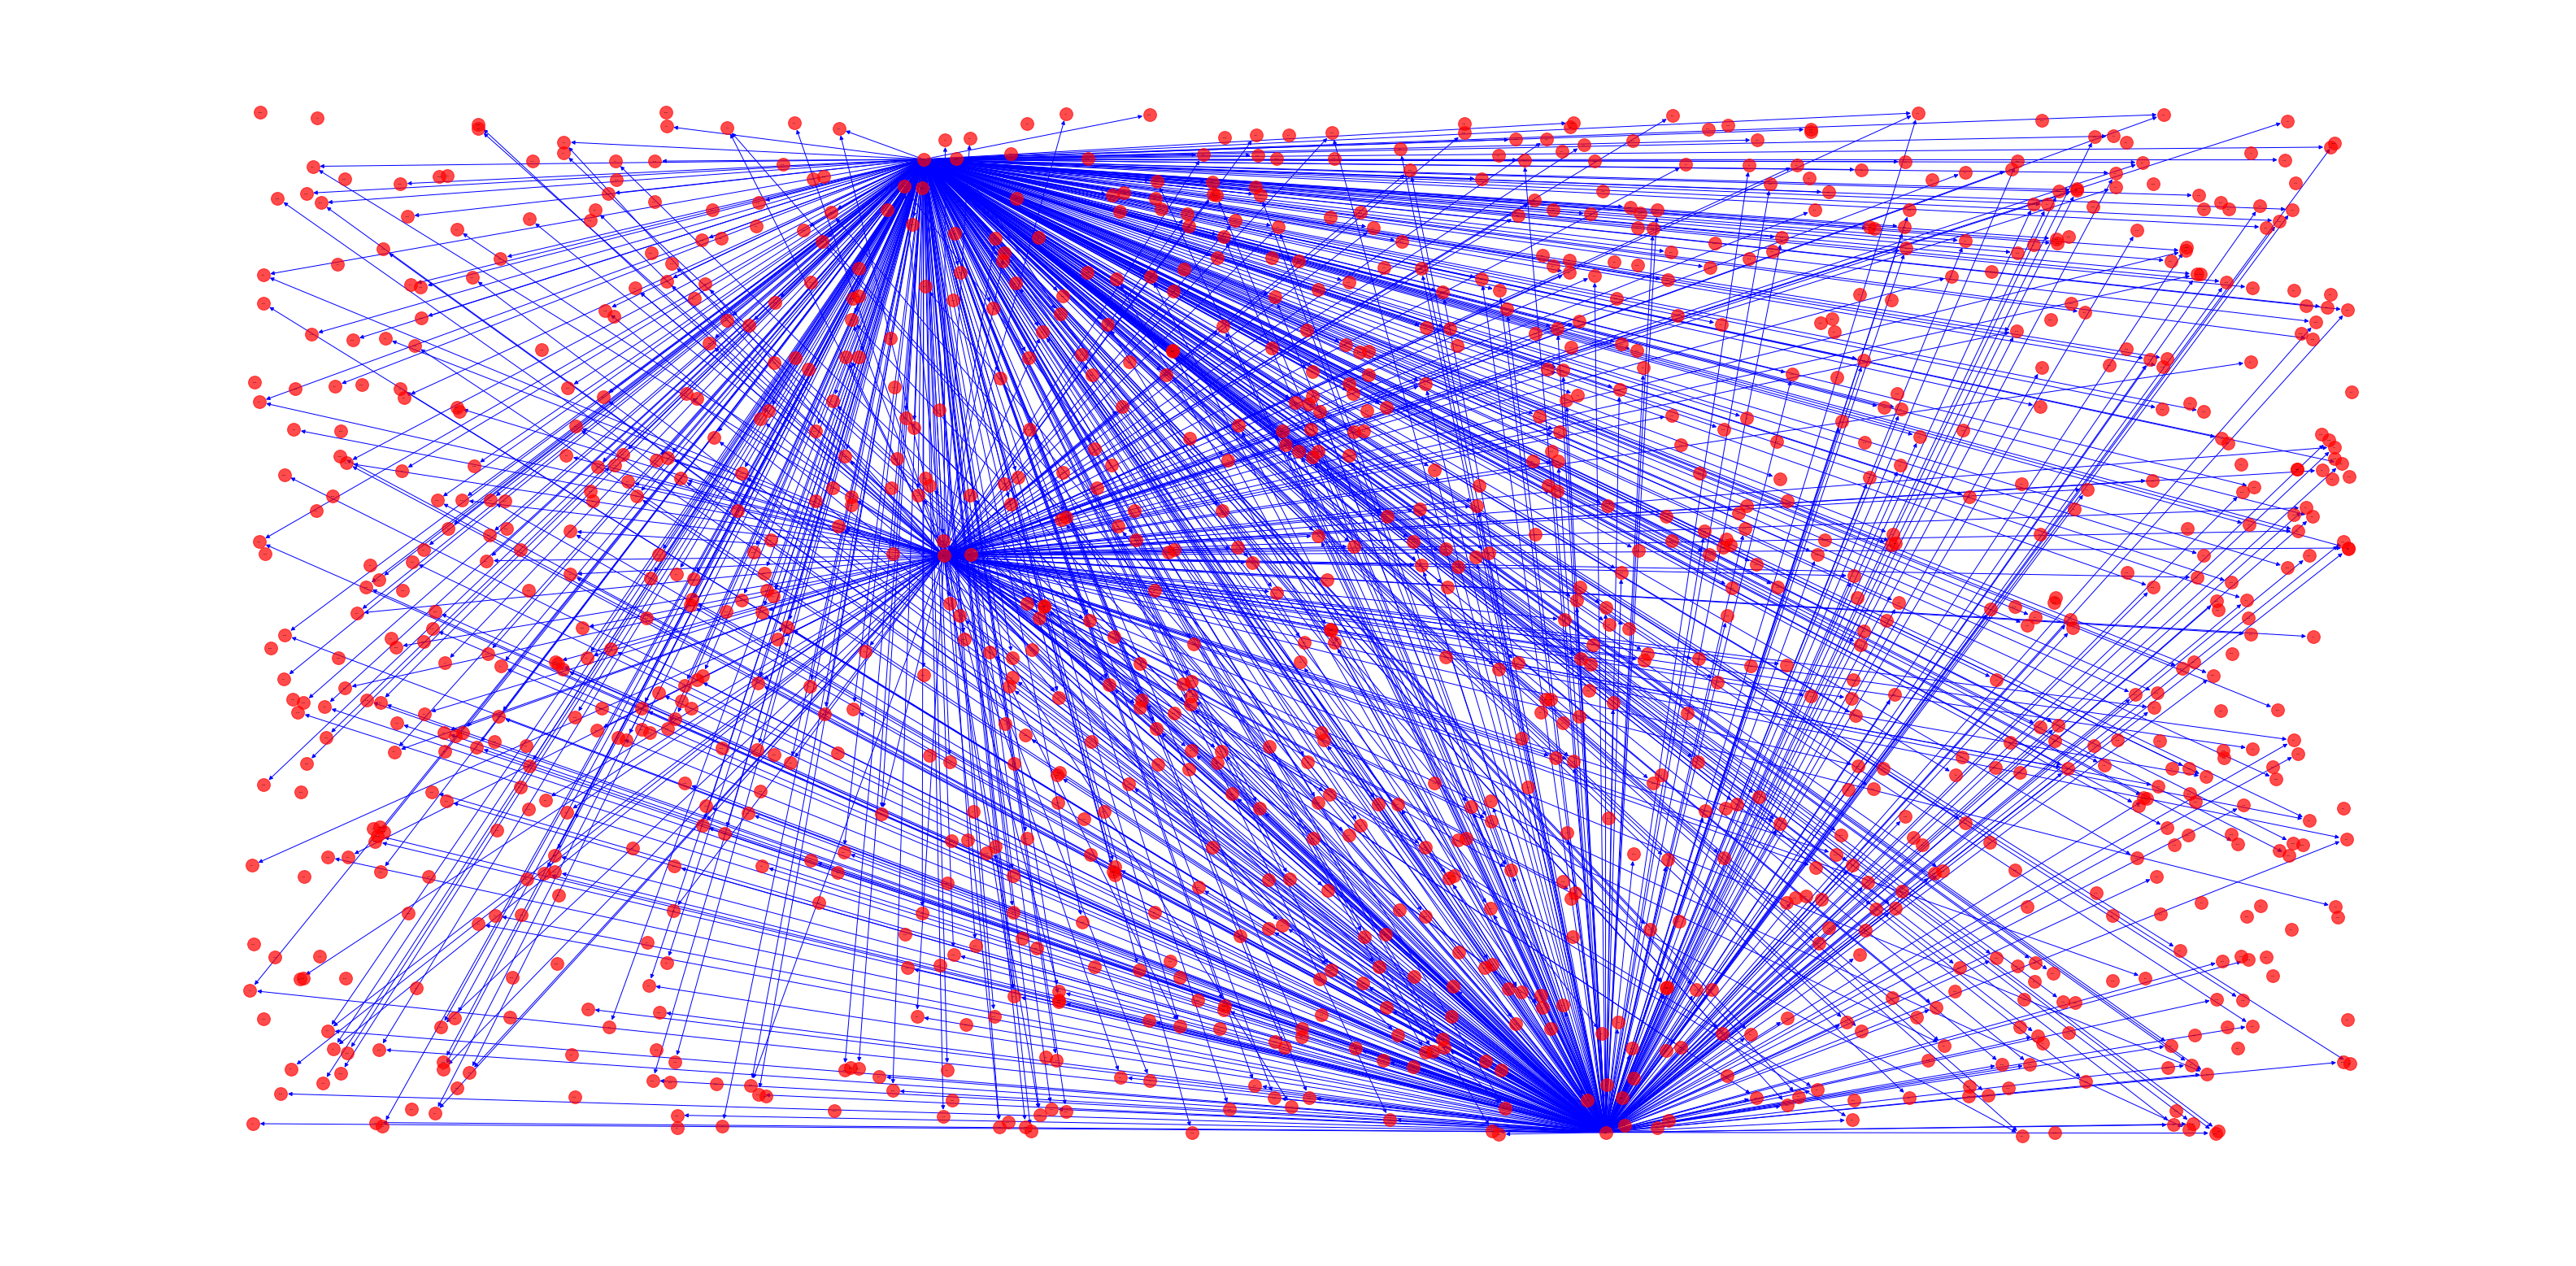

In [41]:
# nodes
nx.draw_networkx_nodes(G_directed,pos,node_size=250, alpha=0.7, with_labels=False, edge_color='0.4')

# edges
nx.draw_networkx_edges(G_directed, pos, edgelist=e,edge_color='b',
                       width=1)
# labels
nx.draw_networkx_labels(G_directed, pos, font_size=2, font_family='sans-serif')

plt.axis('off')
plt.show()

### Outdegree centality for directed graph

In [67]:
out_deg_cent = nx. out_degree_centrality (G_directed)

In [68]:
sorted_out_deg_cent= sorted(out_deg_cent.items(), key=lambda kv: kv[1], reverse=True)
sorted_out_deg_cent

[(347, 0.471195184866724),
 (332, 0.47033533963886504),
 (246, 0.45313843508168533),
 (258, 0.4342218400687876),
 (262, 0.42562338779019776),
 (267, 0.40412725709372316),
 (201, 0.40240756663800514),
 (335, 0.39810834049871024),
 (288, 0.39724849527085127),
 (422, 0.39724849527085127),
 (345, 0.39724849527085127),
 (272, 0.3895098882201204),
 (495, 0.3886500429922614),
 (578, 0.38779019776440243),
 (268, 0.38435081685296646),
 (466, 0.38435081685296646),
 (264, 0.3834909716251075),
 (338, 0.38005159071367156),
 (275, 0.3757523645743766),
 (242, 0.37317282889079967),
 (279, 0.3723129836629407),
 (712, 0.37059329320722273),
 (271, 0.3688736027515047),
 (282, 0.3688736027515047),
 (444, 0.36715391229578676),
 (283, 0.3654342218400688),
 (481, 0.3645743766122098),
 (349, 0.36285468615649186),
 (623, 0.3619948409286329),
 (376, 0.36113499570077384),
 (475, 0.36113499570077384),
 (284, 0.3594153052450559),
 (474, 0.3576956147893379),
 (724, 0.35683576956147894),
 (360, 0.35597592433361996),


### Build an undirected, weighted network 

In [30]:
G_undirected = nx.Graph() #initialize the graph
for index, row in data.iterrows():
    #print(row[0],row[1],row[2])
    G_undirected.add_edge(row[0],row[1]) #add node1,node2,weight list iteratively to the graph

### Community detection in undirected graph

In [33]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G_undirected,weight=None))
c


[frozenset({219,
            242,
            256,
            257,
            258,
            262,
            263,
            264,
            265,
            267,
            272,
            276,
            280,
            286,
            288,
            290,
            293,
            296,
            298,
            299,
            301,
            314,
            315,
            329,
            336,
            337,
            338,
            344,
            345,
            347,
            349,
            351,
            361,
            370,
            372,
            376,
            384,
            391,
            393,
            394,
            404,
            406,
            417,
            422,
            429,
            433,
            438,
            439,
            444,
            449,
            454,
            456,
            457,
            462,
            466,
            470,
            474,
            481,
            48

In [35]:
print("Found" ,len(c), "communities, with lengths:")
print(len(c[0]))
print(len(c[1]))
print(len(c[2]))

Found 3 communities, with lengths:
580
564
20


### Eigenvector centrality for undirected network

In [65]:
eigen_cent = nx.eigenvector_centrality (G_undirected)

In [66]:
sorted_eigen_cent= sorted(eigen_cent.items(), key=lambda kv: kv[1], reverse=True)
sorted_eigen_cent

[(1543, 0.05618453430802222),
 (1671, 0.05164176520413892),
 (1667, 0.05144925765525813),
 (959, 0.050313277801118855),
 (880, 0.0495667425137899),
 (918, 0.049318720359761224),
 (1484, 0.04902690738055804),
 (1764, 0.04762525909631127),
 (1966, 0.04751409496694564),
 (1047, 0.04745492608940363),
 (1721, 0.047440934806707226),
 (347, 0.047295890932142225),
 (1697, 0.04677981225660794),
 (1854, 0.04666073239486065),
 (1562, 0.04657600937475035),
 (1533, 0.04654151644288164),
 (332, 0.04634898305618784),
 (1999, 0.04607489990209723),
 (949, 0.046025808398309005),
 (712, 0.04591178871874578),
 (945, 0.04586483136418795),
 (1851, 0.04518771139750431),
 (1855, 0.04514852040638547),
 (724, 0.045090958224765776),
 (1973, 0.04455032840447682),
 (935, 0.044425526843856304),
 (1665, 0.04386323567622782),
 (578, 0.04378916723332884),
 (1015, 0.04363487240244479),
 (1630, 0.04361994491180762),
 (1590, 0.04353595011710898),
 (713, 0.04346948660032196),
 (1294, 0.043433083175941765),
 (733, 0.043358

### Triangle counts
Computes the number of triangles. Finds the number of triangles that include a node as one vertex.

In [73]:
tri_dict = nx.triangles(G_undirected)
print(tri_dict)

{201: 39294, 219: 20247, 242: 34492, 255: 8934, 259: 29896, 262: 41812, 263: 19510, 264: 36286, 267: 41019, 268: 37243, 271: 33146, 272: 38603, 275: 37178, 277: 28283, 279: 35972, 280: 16912, 288: 39617, 289: 15368, 301: 22698, 315: 27953, 332: 58349, 334: 25195, 335: 42280, 336: 22428, 338: 39545, 340: 14399, 342: 14154, 344: 32303, 347: 60875, 351: 32725, 355: 11240, 357: 14121, 360: 34027, 361: 26619, 363: 22510, 370: 28572, 376: 38051, 380: 23503, 382: 27118, 384: 23657, 391: 19886, 393: 22822, 404: 32974, 408: 18213, 411: 12153, 417: 25516, 421: 18157, 422: 47143, 426: 26200, 430: 10382, 432: 14491, 433: 36246, 434: 8710, 438: 29558, 439: 17792, 444: 40082, 449: 15671, 450: 12954, 461: 24366, 466: 45602, 468: 19328, 472: 3782, 474: 40360, 475: 37259, 480: 29125, 481: 43944, 482: 10544, 483: 19841, 491: 19851, 492: 20726, 494: 44218, 495: 49369, 496: 10613, 498: 17492, 509: 15032, 511: 27466, 513: 31239, 518: 25141, 520: 7337, 522: 25527, 549: 32779, 555: 34778, 556: 33231, 557: 42

In [75]:
for i in tri_dict.keys():
    tri_list.append (tri_dict[i])
print(tri_list)

[39294, 20247, 39294, 20247, 34492, 8934, 29896, 41812, 19510, 36286, 41019, 37243, 33146, 38603, 37178, 28283, 35972, 16912, 39617, 15368, 22698, 27953, 58349, 25195, 42280, 22428, 39545, 14399, 14154, 32303, 60875, 32725, 11240, 14121, 34027, 26619, 22510, 28572, 38051, 23503, 27118, 23657, 19886, 22822, 32974, 18213, 12153, 25516, 18157, 47143, 26200, 10382, 14491, 36246, 8710, 29558, 17792, 40082, 15671, 12954, 24366, 45602, 19328, 3782, 40360, 37259, 29125, 43944, 10544, 19841, 19851, 20726, 44218, 49369, 10613, 17492, 15032, 27466, 31239, 25141, 7337, 25527, 32779, 34778, 33231, 42400, 26052, 19919, 17481, 5685, 52007, 41773, 33445, 22597, 26515, 5261, 50596, 16827, 15508, 22182, 17357, 12109, 36542, 45188, 17525, 17907, 19079, 15004, 33173, 24904, 34800, 26171, 33281, 29111, 42643, 22856, 57207, 30171, 9736, 16960, 42596, 51421, 21085, 27038, 9506, 23323, 10257, 32197, 27865, 22966, 21200, 9537, 11841, 39946, 29973, 19883, 33697, 26867, 30518, 22124, 32064, 31217, 2933, 28912, 3

### Clustering coefficient, undirected, unwieghted

In [79]:
cluster_dict = nx.clustering(G_undirected)
print (cluster_dict)

{201: 0.35957832317575356, 219: 0.35761975413310726, 242: 0.36205991644448177, 255: 0.3422201792691335, 259: 0.36724565756823824, 262: 0.3324983499137184, 263: 0.3751706632309674, 264: 0.35600337499754725, 267: 0.35980632088629244, 268: 0.3574321471073746, 271: 0.3479310562005332, 272: 0.3578327771598072, 275: 0.36965081132675787, 277: 0.36162894770489706, 279: 0.36087117906120525, 280: 0.3873568483737975, 288: 0.3549019959150034, 289: 0.35438717860025365, 301: 0.38698787785791006, 315: 0.359223800038553, 332: 0.35481085551319236, 334: 0.348045310125708, 335: 0.3602283377353668, 336: 0.36305361305361306, 338: 0.36033203943651704, 340: 0.33204196933010494, 342: 0.322003822003822, 344: 0.3585238623751387, 347: 0.3575918137174276, 351: 0.37015043547110055, 355: 0.3443627450980392, 357: 0.35388316667919706, 360: 0.3491345256051138, 361: 0.37358427013599427, 363: 0.36856324191567746, 370: 0.3653241273494438, 376: 0.3620077822492413, 380: 0.342434617906316, 382: 0.3687717580504787, 384: 0.37

In [80]:
max(cluster_dict.values())

0.40454799248769097

In [103]:
avg_clustering_coef = nx.average_clustering(G_undirected)
avg_clustering_coef

0.356625106457955

### Clustering coefficient, undirected, wieghted

In [ ]:
wieghted_cluster = nx.clustering(G_undirected, wieght = )

### Mean degree, undirected

In [94]:
degrees = dict(G_undirected.degree())
sum_of_edges = sum(degrees.values())
mean_degree = sum_of_edges/len (degrees)
mean_degree

344.8848797250859

#### Average degree
Computes the average degree connectivity of graph. The average degree connectivity is the average nearest neighbor degree of nodes with degree k. 

In [109]:
avg_deg = nx.average_degree_connectivity(G_undirected)
print (len(avg_deg))

406


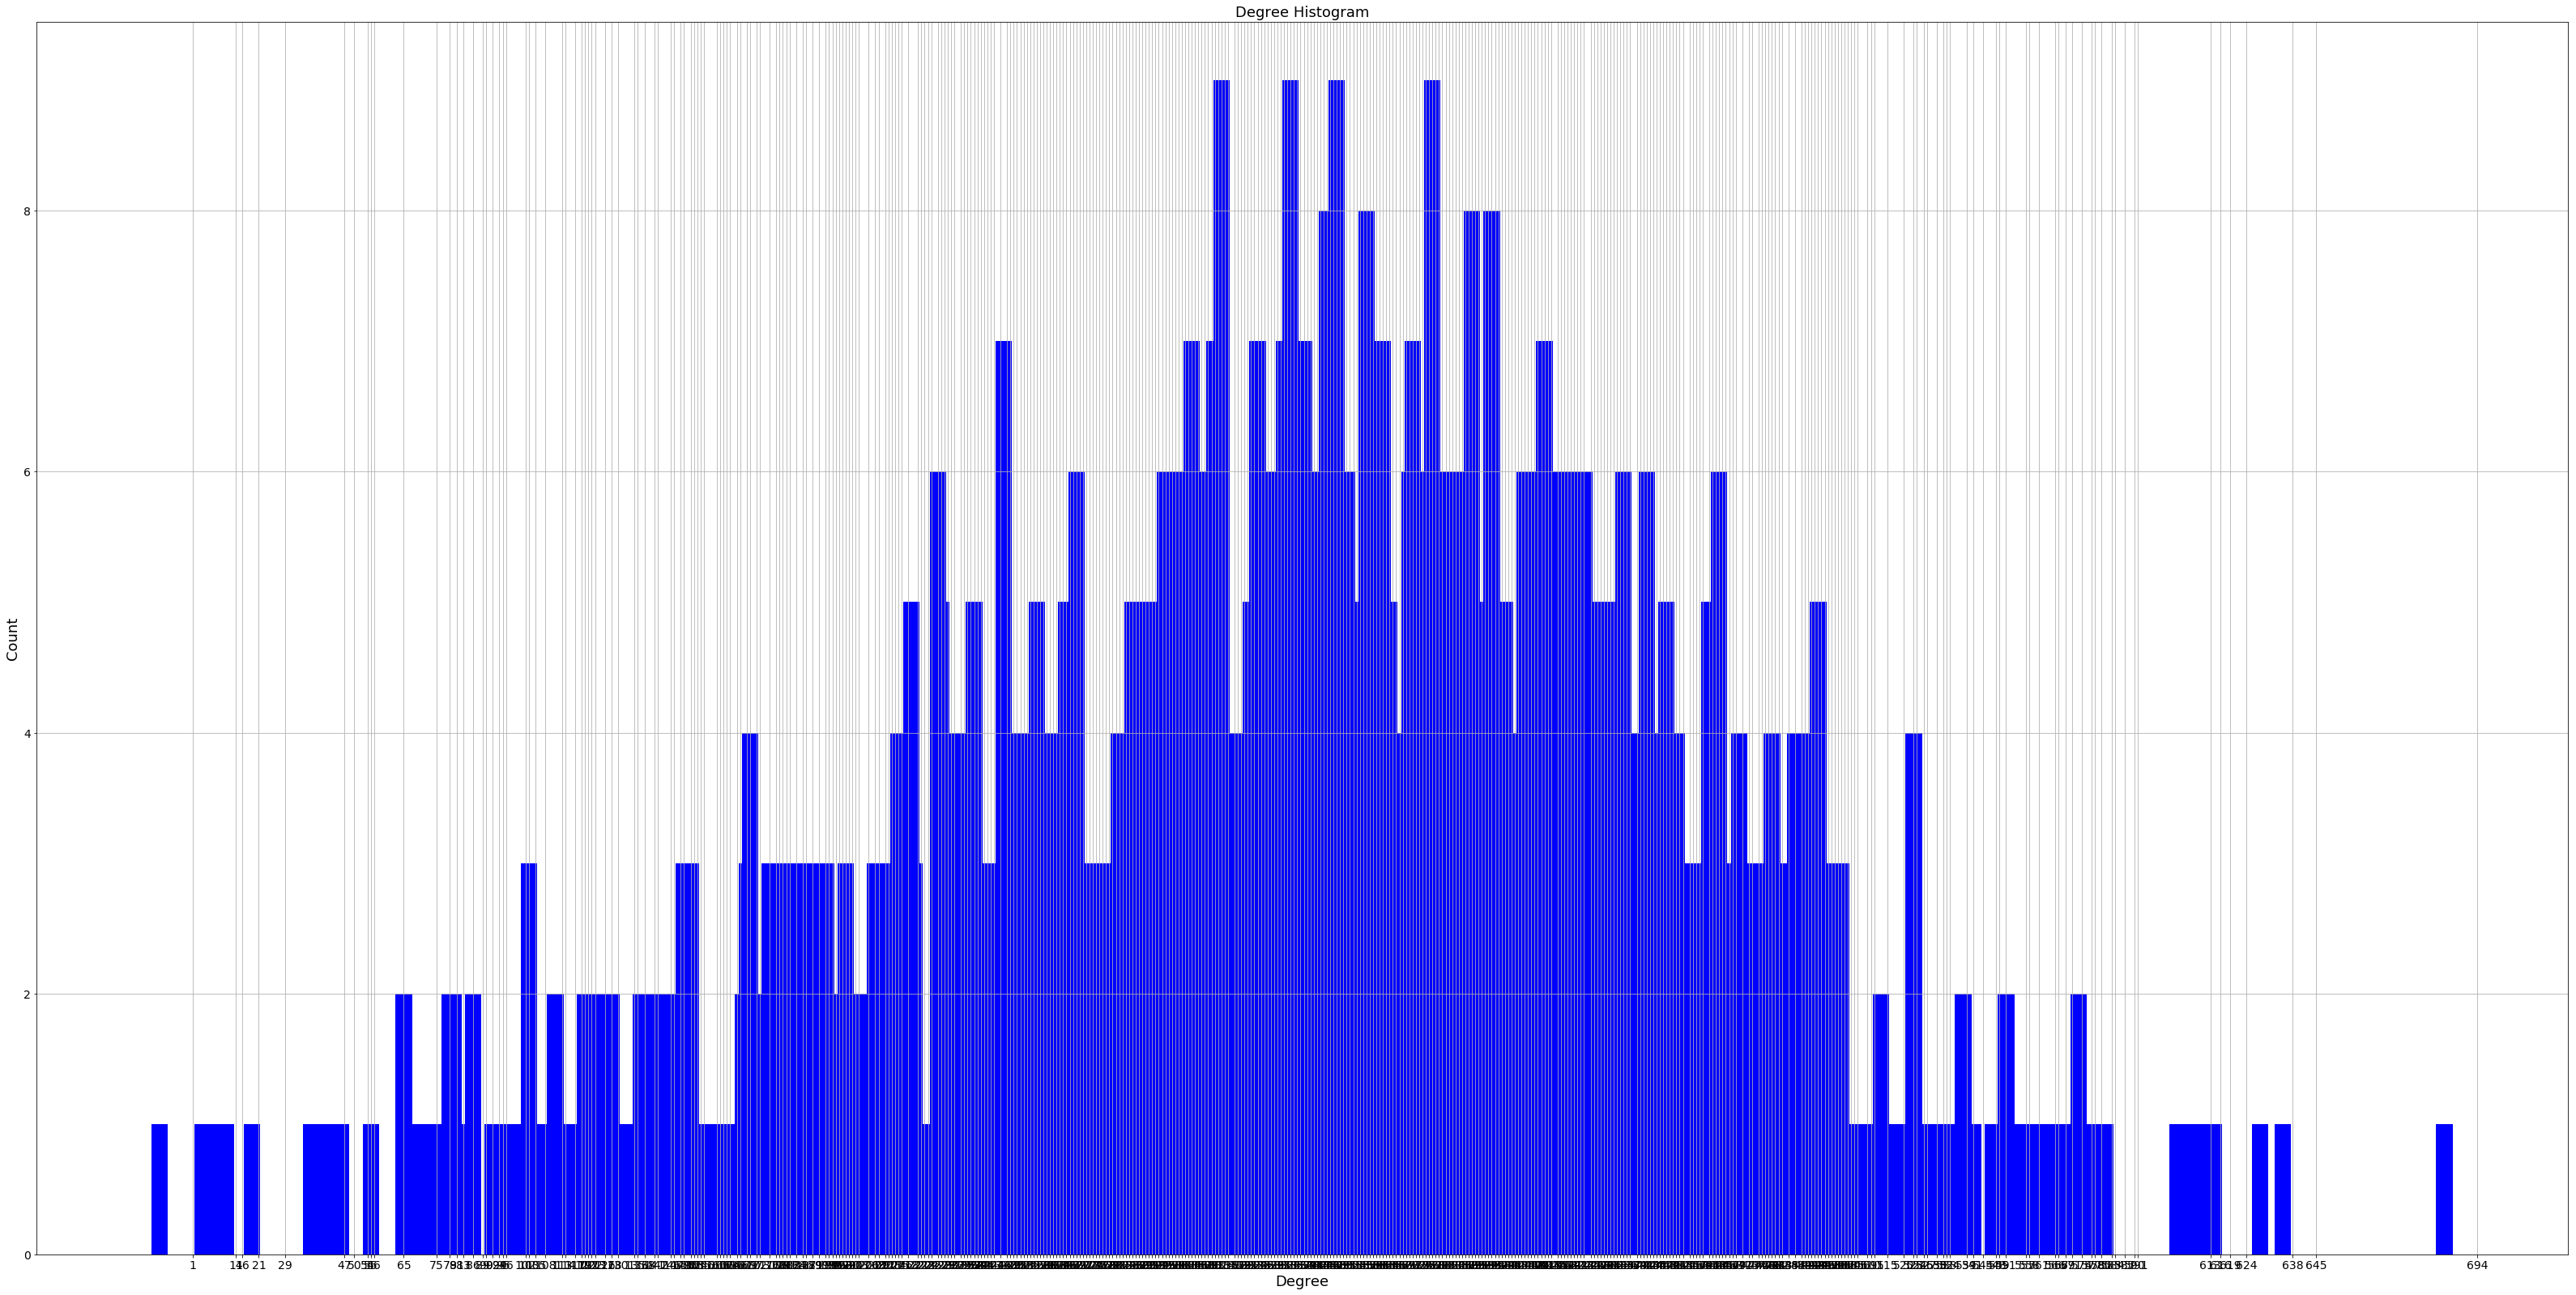

In [108]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_sequence = sorted([d for n, d in G_undirected.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=5, color='b')

plt.title("Degree Histogram", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Degree", fontsize=18)
ax.set_xticks([d + 10 for d in deg])
ax.set_xticklabels(deg)


plt.show()

### Diameter, undirected 
the greatest distance between any pair of vertices

In [96]:
dim = nx.diameter (G_undirected)
dim

3

In [26]:
p = [0.1]
node_list = list(G.nodes())
cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = []
        first = random.choice(node_list) #the first infected node
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
        node_list.remove(first)
        #print(node_list)
        cascade_list.append(infect_list)


In [27]:
print(cascade_list)

[[328, 273, 351, 376, 380, 382, 436, 450, 482, 501, 511, 544, 567, 616, 649, 693, 833, 851, 998, 1201, 1314, 1325, 1388, 1452, 1473, 1523, 1624, 1659, 1667, 1669, 1713, 1793, 1809, 1969, 1993, 2002], [1026, 296, 422, 446, 485, 495, 623, 678, 712, 724, 728, 745, 749, 755, 778, 781, 923, 970, 1154, 1201, 1220, 1222, 1338, 1456, 1461, 1470, 1490, 1511, 1603, 1646, 1651, 1665, 1670, 1789, 1806, 1836, 1923, 1994, 2024], [1017, 298, 347, 360, 404, 739, 740, 829, 880, 907, 917, 928, 938, 1163, 1205, 1517, 1651, 1658, 1721, 1732, 1984], [777, 438, 550, 609, 726, 753, 803, 847, 851, 904, 968, 1157, 1187, 1215, 1276, 1364, 1367, 1382, 1415, 1517, 1525, 1533, 1588, 1741, 1814], [1347, 356, 422, 471, 633, 673, 788, 803, 928, 938, 949, 1015, 1048, 1073, 1228, 1333, 1406, 1452, 1455, 1456, 1476, 1517, 1553, 1622, 1627, 1634, 1719, 1722, 1768, 1928, 1931], [1763, 1435, 1570, 1594, 1719, 1806, 1982], [1031, 464, 505, 549, 667, 678, 855, 864, 873, 949, 1030, 1066, 1072, 1103, 1148, 1208, 1219, 1227, 12

In [ ]:
print(len (cascade_list))

In [28]:
print(len(list(G.nodes)))

1164


In [37]:
p = [0.1]
node_list = list(G.nodes())
unique_cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = [] #the nodes infected by first node
        first = random.choice(node_list) #the first infected node
        node_list.remove(first)
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
                                if potential_node in node_list:
                                    node_list.remove(potential_node)
        
        #print(node_list)
        unique_cascade_list.append(infect_list)


In [38]:
print(unique_cascade_list)

[[1586, 283, 284, 293, 359, 544, 649, 750, 764, 779, 927, 956, 970, 1022, 1112, 1114, 1147, 1241, 1270, 1340, 1625, 1646, 1725, 1825, 1852, 1903, 1929], [1201, 262, 272, 282, 384, 444, 454, 546, 555, 557, 639, 695, 701, 723, 726, 750, 756, 780, 847, 873, 1011, 1084, 1125, 1216, 1279, 1357, 1466, 1510, 1622, 1645, 1691, 1744, 1790, 1806, 1820, 1823, 1854, 1922, 2020, 2038], [1318, 219, 433, 495, 522, 598, 636, 706, 726, 741, 767, 922, 925, 1035, 1072, 1073, 1123, 1205, 1226, 1269, 1282, 1325, 1415, 1536, 1548, 1626, 1631, 1635, 1639, 1735, 1796, 1814, 1828, 1865, 1903, 1943, 1987, 1999, 2020, 2025], [1049, 207, 268, 328, 347, 360, 386, 471, 477, 480, 496, 564, 567, 667, 702, 881, 904, 912, 920, 964, 977, 1048, 1059, 1074, 1111, 1200, 1255, 1258, 1339, 1373, 1452, 1529, 1558, 1618, 1622, 1633, 1655, 1661, 1878, 1888, 2004, 2010], [1475, 219, 366, 426, 455, 482, 494, 594, 623, 636, 732, 885, 910, 971, 998, 1035, 1251, 1276, 1443, 1446, 1450, 1454, 1499, 1564, 1594, 1667, 1765, 1791, 1819,

In [39]:
print(len(unique_cascade_list))

160
